In [ ]:
!pip install catboost

In [ ]:
import numpy as np
import pandas as pd
from functools import reduce
import matplotlib.pyplot as plt
import seaborn as sns
import time
from itertools import combinations

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import xgboost as xgb
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
import torch

In [ ]:
# Load the file with VISDATE as well
csv_file_path3 = 'GENETIC_14Apr2025.csv'
full_df = pd.read_csv(csv_file_path3)
# Updated list of column names, focusing on volumetric measurements (excluding
selected_columns = [
'RID', 'APVOLUME'
]
# Create a dictionary of DataFrames, each containing only one of the specified
dataframe3 = pd.read_csv(csv_file_path3, usecols=selected_columns)
# This will create DataFrames for the columns that exist in the CSV file,
# preventing KeyError in case some columns are missing
print(dataframe3.head())

   RID  APVOLUME
0    2      10.0
1    3      10.0
2    4       8.0
3    5      10.0
4    7       9.0


In [ ]:
csv_file_path4 = '/content/UPENNBIOMK_ROCHE_ELECSYS_14Apr2025.csv'

full_df = pd.read_csv(csv_file_path4)
# Updated list of column names, focusing on volumetric measurements (excluding
selected_columns = [
'RID', 'ABETA42','TAU','PTAU'
]
# Create a dictionary of DataFrames, each containing only one of the specified
dataframe4 = pd.read_csv(csv_file_path4, usecols=selected_columns)
# This will create DataFrames for the columns that exist in the CSV file,
# preventing KeyError in case some columns are missing
print(dataframe4.head())

   RID  ABETA42    TAU   PTAU
0    3    741.5  239.7  22.83
1    3    601.4  251.7  24.18
2    4   1501.0  153.1  13.29
3    4   1176.0  159.7  13.30
4    5    547.3  337.0  33.43


In [ ]:
import pandas as pd

csv_file_path5 = 'UGOTPTAU181_06_18_20_14Apr2025 (1).csv'

full_df = pd.read_csv(csv_file_path4)
# Updated list of column names, focusing on volumetric measurements (excluding
selected_columns = [
'RID','PLASMAPTAU181',
]
# Create a dictionary of DataFrames, each containing only one of the specified
dataframe5 = pd.read_csv(csv_file_path5, usecols=selected_columns)
# This will create DataFrames for the columns that exist in the CSV file,
# preventing KeyError in case some columns are missing
print(dataframe5.head())

   RID  PLASMAPTAU181
0    2         11.939
1    2         12.936
2    2         13.563
3    2         15.506
4    8         18.305


In [ ]:
csv_file_path = 'UCSFFSX7_14Apr2025.csv'

full_df = pd.read_csv(csv_file_path)
# Updated list of column names, focusing on volumetric measurements (excluding
"""selected_columns = [
"ST58CV", "ST58SA", "ST58TA", "ST58TS", # Left Superior Temporal
"ST117CV", "ST117SA", "ST117TA", "ST117TS", # Right Superior Temporal
"ST40CV", "ST40SA", "ST40TA", "ST40TS", # Left Middle Temporal
"ST99CV", "ST99SA", "ST99TA", "ST99TS", # Right Middle Temporal
"ST32CV", "ST32SA", "ST32TA", "ST32TS", # Left Inferior Temporal
"ST91CV", "ST91SA", "ST91TA", "ST91TS", # Right Inferior Temporal
"ST60CV", "ST60SA", "ST60TA", "ST60TS", # Left Temporal Pole
"ST119CV", "ST119SA", "ST119TA", "ST119TS", # Right Temporal Pole
"ST62CV", "ST62SA", "ST62TA", "ST62TS", # Left Transverse Temporal
"ST121CV", "ST121SA", "ST121TA", "ST121TS" # Right Transverse Temporal
]"""
selected_columns = [
"RID",
"ST58TA", # Cortical Thickness Average of Left Superior Temporal
"ST117TA", # Cortical Thickness Average of Right Superior Temporal
"ST40TA", # Cortical Thickness Average of Left Middle Temporal
"ST99TA", # Cortical Thickness Average of Right Middle Temporal
"ST32TA", # Cortical Thickness Average of Left Inferior Temporal
"ST91TA", # Cortical Thickness Average of Right Inferior Temporal
"ST60TA", # Cortical Thickness Average of Left Temporal Pole
"ST119TA", # Cortical Thickness Average of Right Temporal Pole
"ST62TA", # Cortical Thickness Average of Left Transverse Temporal
"ST121TA" # Cortical Thickness Average of Right Transverse Temporal
]
# Create a dictionary of DataFrames, each containing only one of the specified
dataframe9 = pd.read_csv(csv_file_path, usecols=selected_columns)
# This will create DataFrames for the columns that exist in the CSV file,
# preventing KeyError in case some columns are missing
print(dataframe9.head())

    RID  ST117TA  ST119TA  ST121TA  ST32TA  ST40TA  ST58TA  ST60TA  ST62TA  \
0  4213    2.349    3.802    2.145   2.703   2.568   2.471   3.568   2.095   
1  4453    2.571    3.739    2.360   2.509   2.560   2.596   3.785   2.348   
2  4104    2.912    3.865    2.311   2.706   2.663   2.756   3.508   2.421   
3  2153    2.954    3.855    2.770   2.758   2.780   2.922   3.402   2.448   
4  4303    2.554    3.347    2.266   2.693   2.754   2.644   3.303   2.233   

   ST91TA  ST99TA  
0   2.463   2.498  
1   2.734   2.651  
2   2.862   2.903  
3   2.641   2.801  
4   2.824   2.774  


In [ ]:
csv_file_path = 'PTDEMOG_14Apr2025 (1).csv'

full_df = pd.read_csv(csv_file_path)
# Updated list of column names, focusing on volumetric measurements (excluding
selected_columns = [
"RID",
# Demographic and Background Information
"PTGENDER", "PTDOB",
# Clinical and Site-Specific Data
#"PTDOBYY", "PTMARRY", "PTEDUCAT","PTETHCAT",
]
# Create a dictionary of DataFrames, each containing only one of the specified
dataframe7 = pd.read_csv(csv_file_path, usecols=selected_columns)
# This will create DataFrames for the columns that exist in the CSV file,
# preventing KeyError in case some columns are missing
print(dataframe7.head())

   RID  PTGENDER    PTDOB
0    2       1.0  04/1931
1    1       2.0  12/1944
2    3       1.0  05/1924
3    4       1.0  01/1938
4    5       1.0  12/1931


In [ ]:
csv_file_path = 'MEDHIST_14Apr2025.csv'

full_df = pd.read_csv(csv_file_path)
# Updated list of column names, focusing on volumetric measurements (excluding
selected_columns = [
"RID",
# Medical Conditions Related to Brain Structure
"MH14ALCH", # Alcohol Abuse
"MH15DRUG", # Drug Abuse
"MH16SMOK", # Smoking
"MH2NEURL", # Neurologic (other than AD)
"MHPSYCH" # Psychiatric Conditions
]
# Create a dictionary of DataFrames, each containing only one of the specified
dataframe8 = pd.read_csv(csv_file_path, usecols=selected_columns)
# This will create DataFrames for the columns that exist in the CSV file,
# preventing KeyError in case some columns are missing
print(dataframe8.head())

   RID  MHPSYCH  MH2NEURL  MH14ALCH  MH15DRUG  MH16SMOK
0    2        0         0         0         0         0
1    1        0         0         0         0         0
2    3        0         0         0         0         1
3    4        0         0         0         0         1
4    5        0         0         0         0         1


In [ ]:
dfs = [dataframe3, dataframe4, dataframe5, dataframe7, dataframe8, dataframe9]

# Check if 'RID' is present in each DataFrame
rid_check = [True if 'RID' in df.columns else False for df in dfs]

# Display all columns when printing DataFrames
pd.set_option('display.max_columns', None)

# Print the check results
print("RID presence in each DataFrame:", rid_check)

# Merge all DataFrames on 'RID' using inner join
merged_df = reduce(lambda left, right: pd.merge(left, right, on='RID', how='inner'), dfs)

# Display the merged DataFrame
print(merged_df.head())

RID presence in each DataFrame: [True, True, True, True, True, True]
   RID  APVOLUME  ABETA42    TAU   PTAU  PLASMAPTAU181  PTGENDER    PTDOB  \
0   31      10.0   1774.0  266.8  22.55         18.642       2.0  01/1928   
1   31      10.0   1774.0  266.8  22.55         18.642       2.0  01/1928   
2   31      10.0   1774.0  266.8  22.55         18.642       2.0  01/1928   
3   31      10.0   1774.0  266.8  22.55         18.642       2.0  01/1928   
4   31      10.0   1774.0  266.8  22.55         18.642       2.0  01/1928   

   MHPSYCH  MH2NEURL  MH14ALCH  MH15DRUG  MH16SMOK  ST117TA  ST119TA  ST121TA  \
0        0         0         0         0         0    2.318    3.495    2.080   
1        0         0         0         0         0    2.412    2.758    2.469   
2        0         0         0         0         0    2.318    3.495    2.080   
3        0         0         0         0         0    2.412    2.758    2.469   
4        0         0         0         0         0    2.318    

In [ ]:
pd.set_option('display.max_columns', None)
print(merged_df.head())

   RID  APVOLUME  ABETA42    TAU   PTAU  PLASMAPTAU181  PTGENDER    PTDOB  \
0   31      10.0   1774.0  266.8  22.55         18.642       2.0  01/1928   
1   31      10.0   1774.0  266.8  22.55         18.642       2.0  01/1928   
2   31      10.0   1774.0  266.8  22.55         18.642       2.0  01/1928   
3   31      10.0   1774.0  266.8  22.55         18.642       2.0  01/1928   
4   31      10.0   1774.0  266.8  22.55         18.642       2.0  01/1928   

   MHPSYCH  MH2NEURL  MH14ALCH  MH15DRUG  MH16SMOK  ST117TA  ST119TA  ST121TA  \
0        0         0         0         0         0    2.318    3.495    2.080   
1        0         0         0         0         0    2.412    2.758    2.469   
2        0         0         0         0         0    2.318    3.495    2.080   
3        0         0         0         0         0    2.412    2.758    2.469   
4        0         0         0         0         0    2.318    3.495    2.080   

   ST32TA  ST40TA  ST58TA  ST60TA  ST62TA  ST91TA 

In [ ]:
print(merged_df.describe())

                 RID       APVOLUME        ABETA42            TAU  \
count  742688.000000  579314.000000  740998.000000  740588.000000   
mean     2545.892749       0.444097    1238.469569     271.269763   
std      1516.797451       6.235802     637.193384     132.301563   
min        23.000000      -4.000000     203.000000      80.080000   
25%      1261.000000      -4.000000     702.400000     186.400000   
50%      2245.000000      -4.000000    1106.000000     238.800000   
75%      4175.000000       9.000000    1689.000000     310.000000   
max      5296.000000      12.000000    3949.000000    1018.000000   

                PTAU  PLASMAPTAU181       PTGENDER        MHPSYCH  \
count  737202.000000  742688.000000  703651.000000  742688.000000   
mean       25.252673      16.011811       1.498388       0.405950   
std        14.873441       9.512347       0.640717       0.491075   
min         8.260000       0.468000      -4.000000       0.000000   
25%        16.300000      10.3000

In [ ]:
print(merged_df.isnull().sum())

RID                   0
APVOLUME         163374
ABETA42            1690
TAU                2100
PTAU               5486
PLASMAPTAU181         0
PTGENDER          39037
PTDOB             42802
MHPSYCH               0
MH2NEURL              0
MH14ALCH              0
MH15DRUG              0
MH16SMOK              0
ST117TA            5730
ST119TA            5730
ST121TA             560
ST32TA             5730
ST40TA             5730
ST58TA             5730
ST60TA             5730
ST62TA              560
ST91TA             5730
ST99TA             5730
dtype: int64


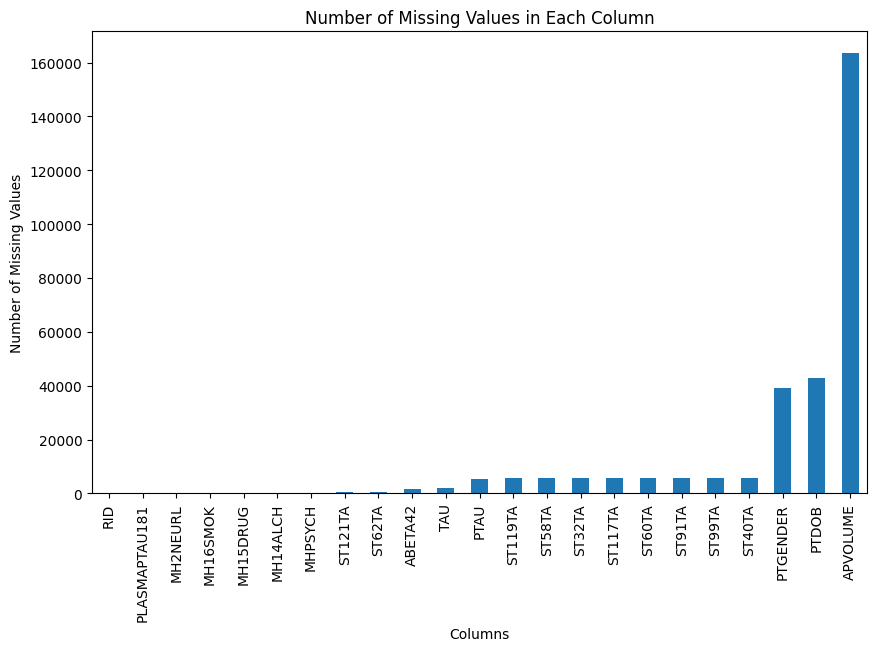

In [ ]:
missing_values = merged_df.isnull().sum()
missing_values.sort_values(inplace=True) # Sort the values
missing_values.plot(kind='bar', figsize=(10, 6)) # Create a bar plot
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.title('Number of Missing Values in Each Column')
plt.show()

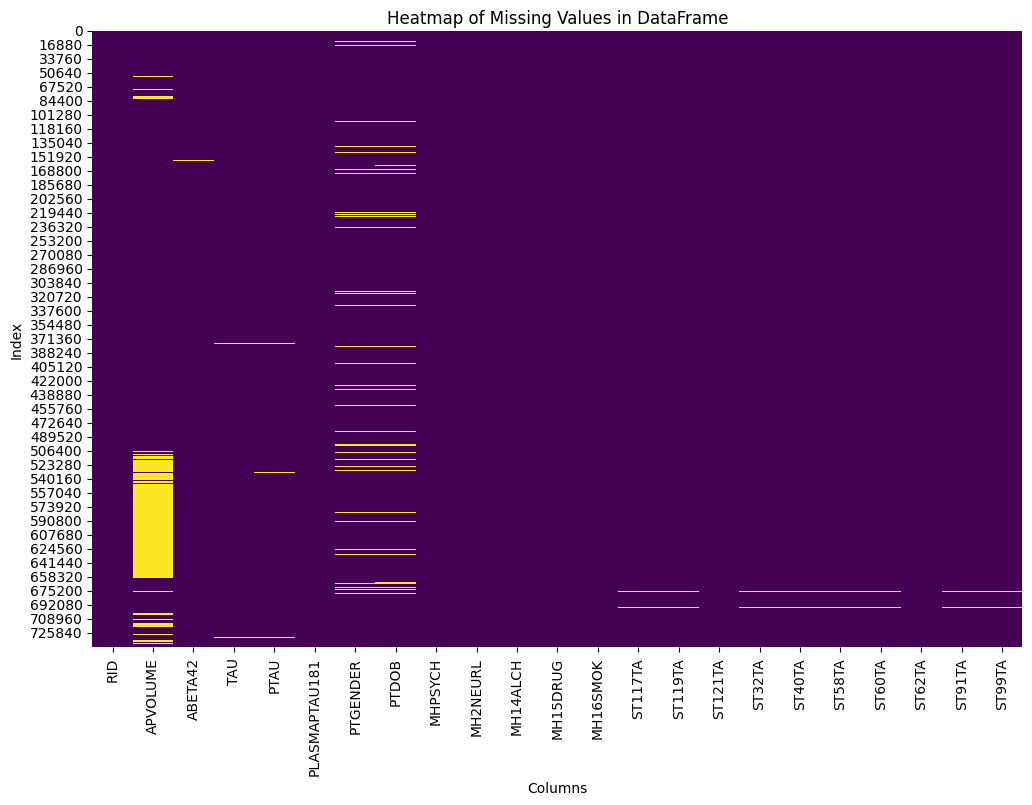

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(merged_df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values in DataFrame')
plt.xlabel('Columns')
plt.ylabel('Index')
plt.show()

In [ ]:
cleaned_df_dropna = merged_df.dropna()
print(cleaned_df_dropna.describe())

                 RID       APVOLUME        ABETA42            TAU  \
count  537865.000000  537865.000000  537865.000000  537865.000000   
mean     2530.891097       0.390705    1261.005796     266.261582   
std      1533.006742       6.215089     643.410172     115.849659   
min        23.000000      -4.000000     203.000000      88.690000   
25%      1261.000000      -4.000000     717.200000     186.600000   
50%      2245.000000      -4.000000    1146.000000     239.100000   
75%      4187.000000       9.000000    1718.000000     313.200000   
max      5296.000000      12.000000    3949.000000     915.800000   

                PTAU  PLASMAPTAU181       PTGENDER        MHPSYCH  \
count  537865.000000  537865.000000  537865.000000  537865.000000   
mean       24.608651      16.228029       1.512430       0.400106   
std        12.965423       9.808985       0.499846       0.489920   
min         8.260000       0.468000       1.000000       0.000000   
25%        16.400000      10.2740

In [ ]:
cleaned_df_mean = merged_df.copy()

for column in cleaned_df_mean.select_dtypes(include=['float64', 'int64']).columns:
    cleaned_df_mean[column].fillna(cleaned_df_mean[column].mean(), inplace=True)


<ipython-input-19-eafc50d4d64f>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cleaned_df_mean[column].fillna(cleaned_df_mean[column].mean(), inplace=True)


In [ ]:
def parse_date(date_str):
    try:
        # Try parsing as "4/1/1931" format
        return pd.to_datetime(date_str, format='%m/%d/%Y')
    except ValueError:
        try:
            # Try parsing as "Apr-31" format
            month, year = date_str.split('-')
            month_num = pd.to_datetime(month, format='%b').month
            return pd.to_datetime(f'1-{month_num}-{year}', format='%d-%m-%y')
        except ValueError:
            try:
                # Try parsing as "01/1934" format
                month, year = date_str.split('/')
                return pd.to_datetime(f'1-{month}-{year}', format='%d-%m-%Y')
            except ValueError:
                # Return NaT for anything else
                return pd.NaT

# Apply it
cleaned_df_dropna['PTDOB'] = cleaned_df_dropna['PTDOB'].apply(parse_date)

# Print a few values to confirm
print(cleaned_df_dropna['PTDOB'].head())


0   1928-01-01
1   1928-01-01
2   1928-01-01
3   1928-01-01
4   1928-01-01
Name: PTDOB, dtype: datetime64[ns]


<ipython-input-20-a20a3a60c4fb>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df_dropna['PTDOB'] = cleaned_df_dropna['PTDOB'].apply(parse_date)


In [ ]:
target_names = [
"ST58TA", # Cortical Thickness Average of Left Superior Temporal
"ST117TA", # Cortical Thickness Average of Right Superior Temporal
"ST40TA", # Cortical Thickness Average of Left Middle Temporal
"ST99TA", # Cortical Thickness Average of Right Middle Temporal
"ST32TA", # Cortical Thickness Average of Left Inferior Temporal
"ST91TA", # Cortical Thickness Average of Right Inferior Temporal
"ST60TA", # Cortical Thickness Average of Left Temporal Pole
"ST119TA", # Cortical Thickness Average of Right Temporal Pole
"ST62TA", # Cortical Thickness Average of Left Transverse Temporal
"ST121TA" # Cortical Thickness Average of Right Transverse Temporal
]
# Features DataFrame (X)
# Drop target columns from the main DataFrame to create the features DataFrame
X = cleaned_df_dropna.drop(columns=target_names + ['RID'])
# Targets DataFrame (y)
# Select only the target columns for the target DataFrame
y = cleaned_df_dropna[target_names]

In [ ]:
X['PTDOB'] = pd.to_datetime(X['PTDOB'])
X['year'] = X['PTDOB'].dt.year
X['month'] = X['PTDOB'].dt.month
X['day'] = X['PTDOB'].dt.day
# Now, you can drop the original datetime column if needed
X = X.drop(columns=['PTDOB'])

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Columns to use for outlier detection and scaling
cols = ['APVOLUME', 'ABETA42', 'TAU', 'PTAU', 'PLASMAPTAU181']

# Calculate Q1, Q3, and IQR
Q1 = X[cols].quantile(0.25)
Q3 = X[cols].quantile(0.75)
IQR = Q3 - Q1

# Define an outlier mask (True = not an outlier)
outlier_mask = ~((X[cols] < (Q1 - 1.5 * IQR)) | (X[cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Apply the mask to filter out outliers
X_clean = X.loc[outlier_mask, cols]
y_clean = y[outlier_mask]

# Normalize the data using Min-Max Scaling
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_clean), columns=cols)

# Display shapes before and after cleaning
print("Original shape of X:", X.shape)
print("New shape of X after outlier removal and scaling:", X_scaled.shape)
print("Original shape of y:", y.shape)
print("New shape of y after outlier and scaling process:", y_clean.shape)


Original shape of X: (537865, 14)
New shape of X after outlier removal and scaling: (484436, 5)
Original shape of y: (537865, 10)
New shape of y after outlier and scaling process: (484436, 10)


In [ ]:
correlation_matrix = X.corr(method='spearman')

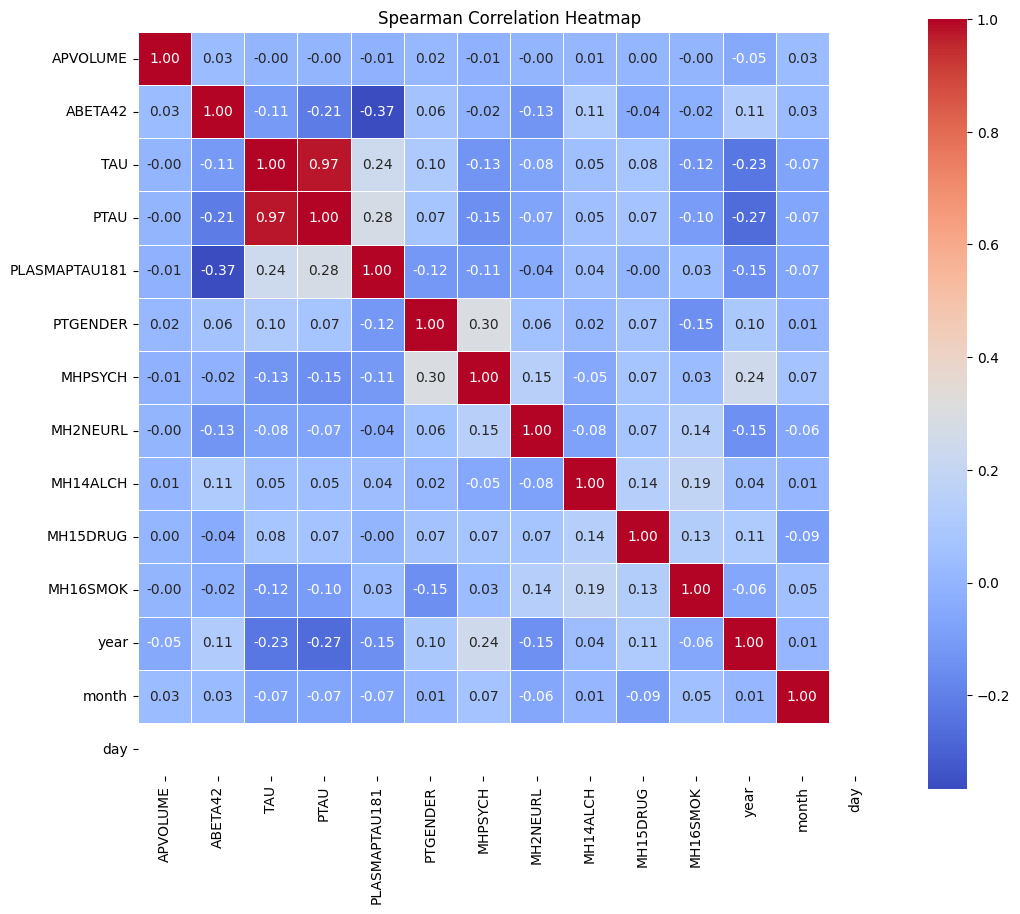

In [ ]:
plt.figure(figsize=(12, 10)) # Set the figure size as needed
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm',
cbar=True, square=True, linewidths=.5)
plt.title('Spearman Correlation Heatmap')
plt.show()

In [ ]:
cleaned_df_dropna.shape

(537865, 23)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Split the dataset into training and testing sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now split the training set into four parts, simulating distribution across four clients
parts_X = np.array_split(X_train_full, 4)
parts_y = np.array_split(y_train_full, 4)

# Define the models to be used
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(n_estimators=100),
    'k-NN': KNeighborsRegressor(n_neighbors=10)
}

# Train models on each client's data for each target and store predictions
client_predictions = {
    name: {col: [] for col in y_train_full.columns}
    for name in models.keys()
}

for i in range(4):
    X_train, y_train = parts_X[i], parts_y[i]
    for name, model in models.items():
        for col in y_train.columns:
            model.fit(X_train, y_train[col])
            predictions = model.predict(X_test)
            client_predictions[name][col].append(predictions)

# Average predictions from each client for each target variable and calculate performance
for name, targets in client_predictions.items():
    print(f"\nResults for {name}:")
    for target_col, predictions in targets.items():
        average_prediction = np.mean(predictions, axis=0)
        mse = mean_squared_error(y_test[target_col], average_prediction)
        r2 = r2_score(y_test[target_col], average_prediction)
        print(f"  {target_col} - Averaged MSE: {mse:.4f}, Averaged R^2 Score: {r2:.4f}")

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)



Results for Linear Regression:
  ST58TA - Averaged MSE: 0.0287, Averaged R^2 Score: 0.2937
  ST117TA - Averaged MSE: 0.0287, Averaged R^2 Score: 0.3011
  ST40TA - Averaged MSE: 0.0287, Averaged R^2 Score: 0.1904
  ST99TA - Averaged MSE: 0.0277, Averaged R^2 Score: 0.1649
  ST32TA - Averaged MSE: 0.0302, Averaged R^2 Score: 0.1293
  ST91TA - Averaged MSE: 0.0282, Averaged R^2 Score: 0.1500
  ST60TA - Averaged MSE: 0.1342, Averaged R^2 Score: 0.0553
  ST119TA - Averaged MSE: 0.1285, Averaged R^2 Score: 0.1191
  ST62TA - Averaged MSE: 0.0389, Averaged R^2 Score: 0.1289
  ST121TA - Averaged MSE: 0.0398, Averaged R^2 Score: 0.1548

Results for Decision Tree:
  ST58TA - Averaged MSE: 0.0042, Averaged R^2 Score: 0.8959
  ST117TA - Averaged MSE: 0.0038, Averaged R^2 Score: 0.9087
  ST40TA - Averaged MSE: 0.0043, Averaged R^2 Score: 0.8793
  ST99TA - Averaged MSE: 0.0039, Averaged R^2 Score: 0.8820
  ST32TA - Averaged MSE: 0.0053, Averaged R^2 Score: 0.8474
  ST91TA - Averaged MSE: 0.0059, Ave

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'X' and 'y' are defined (features and targets)
# Replace with actual dataset loading if needed
# Example:
# data = pd.read_csv("cleaned_data.csv")
# X = data.drop(columns=['target1', 'target2'])  # replace with actual target columns
# y = data[['target1', 'target2']]

# Split the entire dataset into a training set and a testing set
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now split the training set into four parts, simulating distribution across four clients
parts_X = np.array_split(X_train_full, 4)
parts_y = np.array_split(y_train_full, 4)

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(n_estimators=100),
    'k-NN': KNeighborsRegressor(n_neighbors=10)
}

# Train models on each client's data for each target and store predictions
client_predictions = {name: {col: [] for col in y_train_full.columns} for name in models}
weights = [len(part) for part in parts_y]  # Number of samples in each client's data

for i in range(4):
    X_train, y_train = parts_X[i], parts_y[i]
    for name, model in models.items():
        for col in y_train.columns:
            model.fit(X_train, y_train[col])
            predictions = model.predict(X_test)
            client_predictions[name][col].append(predictions)

# Calculate weighted average of predictions from each client for each target variable
for name, targets in client_predictions.items():
    print(f"Results for {name}:")
    for target_col, predictions in targets.items():
        # Compute weighted average
        weighted_average_prediction = np.average(predictions, axis=0, weights=weights)
        mse = mean_squared_error(y_test[target_col], weighted_average_prediction)
        r2 = r2_score(y_test[target_col], weighted_average_prediction)
        print(f"  {target_col} - Weighted Averaged MSE: {mse:.4f}, Weighted Averaged R2: {r2:.4f}")


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


Results for Linear Regression:
  ST58TA - Weighted Averaged MSE: 0.0287, Weighted Averaged R2: 0.2937
  ST117TA - Weighted Averaged MSE: 0.0287, Weighted Averaged R2: 0.3011
  ST40TA - Weighted Averaged MSE: 0.0287, Weighted Averaged R2: 0.1904
  ST99TA - Weighted Averaged MSE: 0.0277, Weighted Averaged R2: 0.1649
  ST32TA - Weighted Averaged MSE: 0.0302, Weighted Averaged R2: 0.1293
  ST91TA - Weighted Averaged MSE: 0.0282, Weighted Averaged R2: 0.1500
  ST60TA - Weighted Averaged MSE: 0.1342, Weighted Averaged R2: 0.0553
  ST119TA - Weighted Averaged MSE: 0.1285, Weighted Averaged R2: 0.1191
  ST62TA - Weighted Averaged MSE: 0.0389, Weighted Averaged R2: 0.1289
  ST121TA - Weighted Averaged MSE: 0.0398, Weighted Averaged R2: 0.1548
Results for Decision Tree:
  ST58TA - Weighted Averaged MSE: 0.0042, Weighted Averaged R2: 0.8959
  ST117TA - Weighted Averaged MSE: 0.0038, Weighted Averaged R2: 0.9087
  ST40TA - Weighted Averaged MSE: 0.0043, Weighted Averaged R2: 0.8792
  ST99TA - Weig

In [ ]:
!pip install xgboost

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

# Assuming 'X' and 'y' are defined
# X = features, y = DataFrame with multiple target columns

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost Regressor
model = xgb.XGBRegressor(objective='reg:squarederror')

# Train and evaluate model for each target variable
for target_col in y_train.columns:
    print(f"Results for target variable: {target_col}")
    model.fit(X_train, y_train[target_col])
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test[target_col], y_pred)
    r2 = r2_score(y_test[target_col], y_pred)
    print(f"XGBoost - MSE: {mse:.4f}, R^2 Score: {r2:.4f}")
    print()


Results for target variable: ST58TA
XGBoost - MSE: 0.0043, R^2 Score: 0.8933

Results for target variable: ST117TA
XGBoost - MSE: 0.0039, R^2 Score: 0.9057

Results for target variable: ST40TA
XGBoost - MSE: 0.0044, R^2 Score: 0.8761

Results for target variable: ST99TA
XGBoost - MSE: 0.0041, R^2 Score: 0.8776

Results for target variable: ST32TA
XGBoost - MSE: 0.0054, R^2 Score: 0.8450

Results for target variable: ST91TA
XGBoost - MSE: 0.0060, R^2 Score: 0.8204

Results for target variable: ST60TA
XGBoost - MSE: 0.0282, R^2 Score: 0.8018

Results for target variable: ST119TA
XGBoost - MSE: 0.0326, R^2 Score: 0.7769

Results for target variable: ST62TA
XGBoost - MSE: 0.0069, R^2 Score: 0.8456

Results for target variable: ST121TA
XGBoost - MSE: 0.0082, R^2 Score: 0.8256



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming X and y are already defined DataFrames
# X = features, y = target variables (possibly multi-output)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize regression models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(n_estimators=100),
    'k-NN': KNeighborsRegressor(n_neighbors=10)
}

# Train and evaluate each model for each target variable
for target_col in y_train.columns:
    print(f"\nResults for target variable: {target_col}")
    for name, model in models.items():
        model.fit(X_train, y_train[target_col])
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test[target_col], y_pred)
        r2 = r2_score(y_test[target_col], y_pred)
        accuracy = model.score(X_test, y_test[target_col])  # Same as R² for regression models
        print(f"{name} - MSE: {mse:.4f}, R^2 Score: {r2:.4f}, Accuracy: {accuracy:.4f}")



Results for target variable: ST58TA
Linear Regression - MSE: 0.0287, R^2 Score: 0.2937, Accuracy: 0.2937
Decision Tree - MSE: 0.0042, R^2 Score: 0.8959, Accuracy: 0.8959
Random Forest - MSE: 0.0042, R^2 Score: 0.8960, Accuracy: 0.8960
k-NN - MSE: 0.0045, R^2 Score: 0.8891, Accuracy: 0.8891

Results for target variable: ST117TA
Linear Regression - MSE: 0.0287, R^2 Score: 0.3011, Accuracy: 0.3011
Decision Tree - MSE: 0.0037, R^2 Score: 0.9090, Accuracy: 0.9090
Random Forest - MSE: 0.0037, R^2 Score: 0.9090, Accuracy: 0.9090
k-NN - MSE: 0.0040, R^2 Score: 0.9031, Accuracy: 0.9031

Results for target variable: ST40TA
Linear Regression - MSE: 0.0287, R^2 Score: 0.1904, Accuracy: 0.1904
Decision Tree - MSE: 0.0043, R^2 Score: 0.8793, Accuracy: 0.8793
Random Forest - MSE: 0.0043, R^2 Score: 0.8795, Accuracy: 0.8795
k-NN - MSE: 0.0045, R^2 Score: 0.8716, Accuracy: 0.8716

Results for target variable: ST99TA
Linear Regression - MSE: 0.0277, R^2 Score: 0.1649, Accuracy: 0.1649
Decision Tree - M

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011217 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1099
[LightGBM] [Info] Number of data points in the train set: 107573, number of used features: 13
[LightGBM] [Info] Start training from score 2.560634
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017887 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1099
[LightGBM] [Info] Number of data points in the train set: 107573, number of used features: 13
[LightGBM] [Info] Start training from score 2.582565
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.033130 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total 

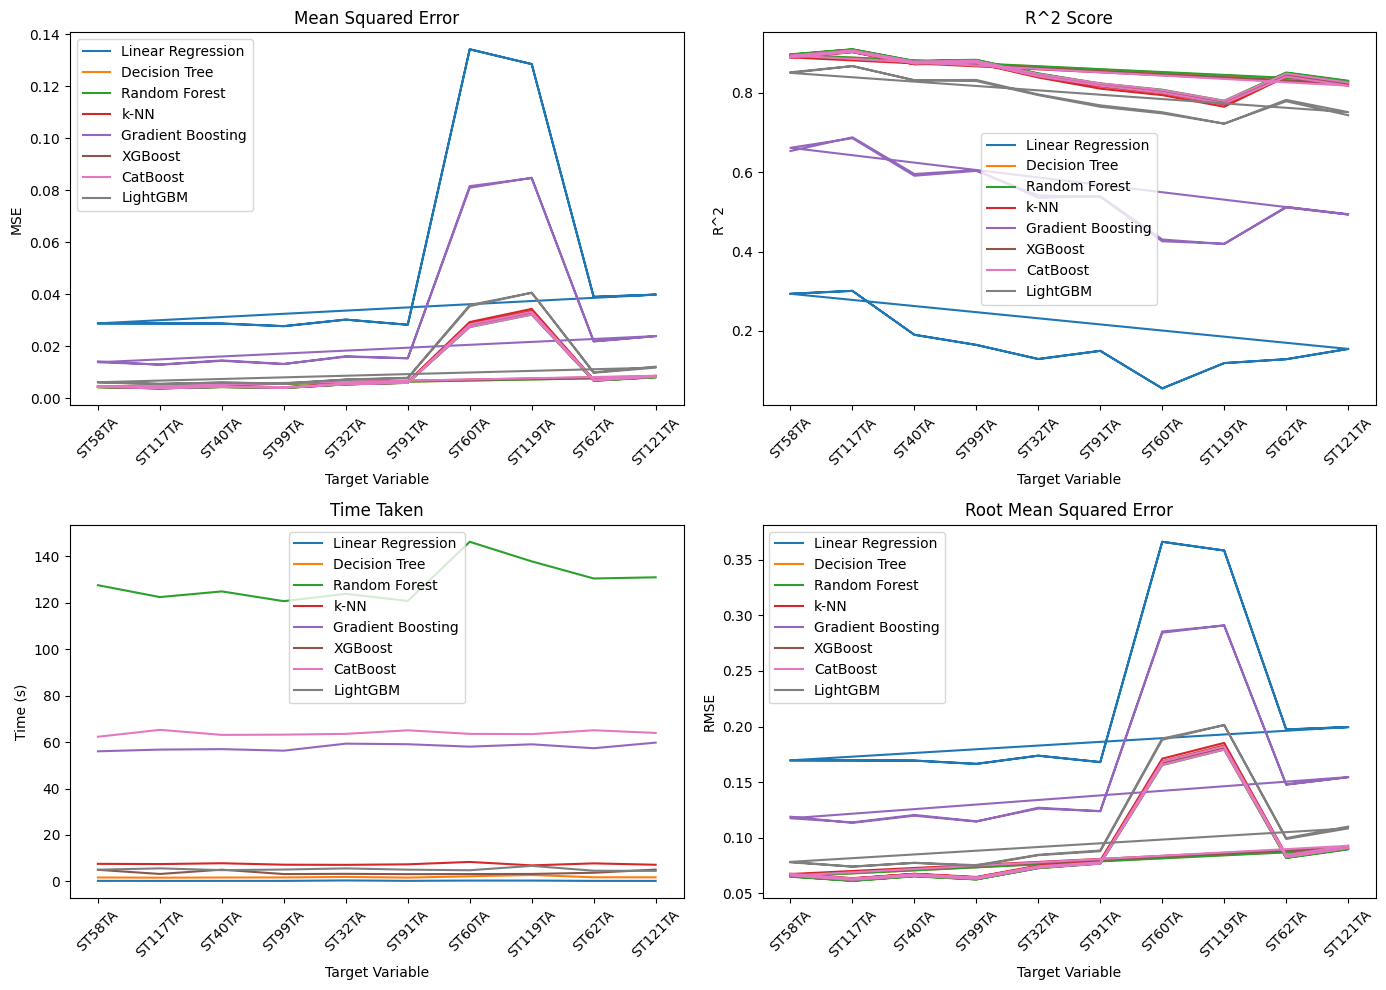

In [ ]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import xgboost as xgb
from catboost import CatBoostRegressor
import lightgbm as lgb
import matplotlib.pyplot as plt

# Assuming X and y are already defined as your feature and target DataFrames
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define regression models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(n_estimators=100),
    'k-NN': KNeighborsRegressor(n_neighbors=10),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': xgb.XGBRegressor(objective='reg:squarederror'),
    'CatBoost': CatBoostRegressor(verbose=0),
    'LightGBM': lgb.LGBMRegressor()
}

# Simulate federated learning with 4 clients
parts_X = np.array_split(X_train_full, 4)
parts_y = np.array_split(y_train_full, 4)

results = []
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Collect predictions from each client
client_predictions = {
    name: {col: [] for col in y_train_full.columns} for name in models
}

# Federated-style training
for i in range(4):
    X_train, y_train = parts_X[i], parts_y[i]
    for name, model in models.items():
        for col in y_train.columns:
            model.fit(X_train, y_train[col])
            predictions = model.predict(X_test)
            client_predictions[name][col].append(predictions)

# Average predictions and compute metrics
for name, targets in client_predictions.items():
    print(f"Results for {name}:")
    for target_col, predictions in targets.items():
        average_prediction = np.mean(predictions, axis=0)
        mse = mean_squared_error(y_test[target_col], average_prediction)
        mae = mean_absolute_error(y_test[target_col], average_prediction)
        rmse = np.sqrt(mse)
        mape = np.mean(np.abs((y_test[target_col] - average_prediction) / y_test[target_col])) * 100
        r2 = r2_score(y_test[target_col], average_prediction)
        rse = np.sqrt(np.sum((y_test[target_col] - average_prediction) ** 2) / len(y_test[target_col]))

        print(f" {target_col} - Averaged MSE: {mse:.4f}, MAE: {mae:.4f}, RMSE: {rmse:.4f}, MAPE: {mape:.2f}%, R2: {r2:.4f}, RSE: {rse:.4f}")

        results.append({
            'model': name,
            'target_col': target_col,
            'mse': mse,
            'mae': mae,
            'rmse': rmse,
            'mape': mape,
            'r2': r2,
            'rse': rse
        })

# Classical centralized training
for target_col in y_train_full.columns:
    print(f"\nResults for target variable: {target_col}")
    for name, model in models.items():
        start_time = time.time()
        model.fit(X_train_full, y_train_full[target_col])
        y_pred = model.predict(X_test)
        end_time = time.time()
        elapsed_time = end_time - start_time

        mse = mean_squared_error(y_test[target_col], y_pred)
        mae = mean_absolute_error(y_test[target_col], y_pred)
        rmse = np.sqrt(mse)
        mape = np.mean(np.abs((y_test[target_col] - y_pred) / y_test[target_col])) * 100
        r2 = r2_score(y_test[target_col], y_pred)
        rse = np.sqrt(np.sum((y_test[target_col] - y_pred) ** 2) / len(y_test[target_col]))

        print(f"{name} - MSE: {mse:.4f}, MAE: {mae:.4f}, RMSE: {rmse:.4f}, MAPE: {mape:.2f}%, R2: {r2:.4f}, RSE: {rse:.4f}, Time: {elapsed_time:.2f}s")

        results.append({
            'model': name,
            'target_col': target_col,
            'mse': mse,
            'mae': mae,
            'rmse': rmse,
            'mape': mape,
            'r2': r2,
            'rse': rse,
            'time': elapsed_time
        })

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Plotting results
plt.figure(figsize=(14, 10))

# MSE
plt.subplot(2, 2, 1)
for name in results_df['model'].unique():
    model_results = results_df[results_df['model'] == name]
    plt.plot(model_results['target_col'], model_results['mse'], label=name)
plt.title('Mean Squared Error')
plt.xlabel('Target Variable')
plt.ylabel('MSE')
plt.xticks(rotation=45)
plt.legend()

# R^2
plt.subplot(2, 2, 2)
for name in results_df['model'].unique():
    model_results = results_df[results_df['model'] == name]
    plt.plot(model_results['target_col'], model_results['r2'], label=name)
plt.title('R^2 Score')
plt.xlabel('Target Variable')
plt.ylabel('R^2')
plt.xticks(rotation=45)
plt.legend()

# Time
plt.subplot(2, 2, 3)
for name in results_df['model'].unique():
    model_results = results_df[results_df['model'] == name]
    if 'time' in model_results.columns:
        plt.plot(model_results['target_col'], model_results['time'], label=name)
plt.title('Time Taken')
plt.xlabel('Target Variable')
plt.ylabel('Time (s)')
plt.xticks(rotation=45)
plt.legend()

# RMSE
plt.subplot(2, 2, 4)
for name in results_df['model'].unique():
    model_results = results_df[results_df['model'] == name]
    plt.plot(model_results['target_col'], model_results['rmse'], label=name)
plt.title('Root Mean Squared Error')
plt.xlabel('Target Variable')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

Results for target variable: ST58TA
Linear Regression - MSE: 0.0287, MAE: 0.1311, RMSE: 0.1695, MAPE: 5.27%, R2: 0.2937, Time: 0.23s
Decision Tree - MSE: 0.0042, MAE: 0.0484, RMSE: 0.0651, MAPE: 1.92%, R2: 0.8959, Time: 1.65s
Random Forest - MSE: 0.0042, MAE: 0.0484, RMSE: 0.0650, MAPE: 1.91%, R2: 0.8960, Time: 126.40s
k-NN - MSE: 0.0045, MAE: 0.0494, RMSE: 0.0672, MAPE: 1.95%, R2: 0.8891, Time: 7.72s
Gradient Boosting - MSE: 0.0138, MAE: 0.0913, RMSE: 0.1174, MAPE: 3.66%, R2: 0.6614, Time: 60.64s
XGBoost - MSE: 0.0043, MAE: 0.0495, RMSE: 0.0659, MAPE: 1.96%, R2: 0.8933, Time: 3.16s
CatBoost - MSE: 0.0043, MAE: 0.0494, RMSE: 0.0657, MAPE: 1.96%, R2: 0.8939, Time: 63.32s
[LightGBM] [Info] Total Bins 1102
[LightGBM] [Info] Number of data points in the train set: 430292, number of used features: 13
[LightGBM] [Info] Start training from score 2.560479
LightGBM - MSE: 0.0061, MAE: 0.0588, RMSE: 0.0781, MAPE: 2.33%, R2: 0.8501, Time: 5.47s
Results for target variable: ST117TA
Linear Regressi

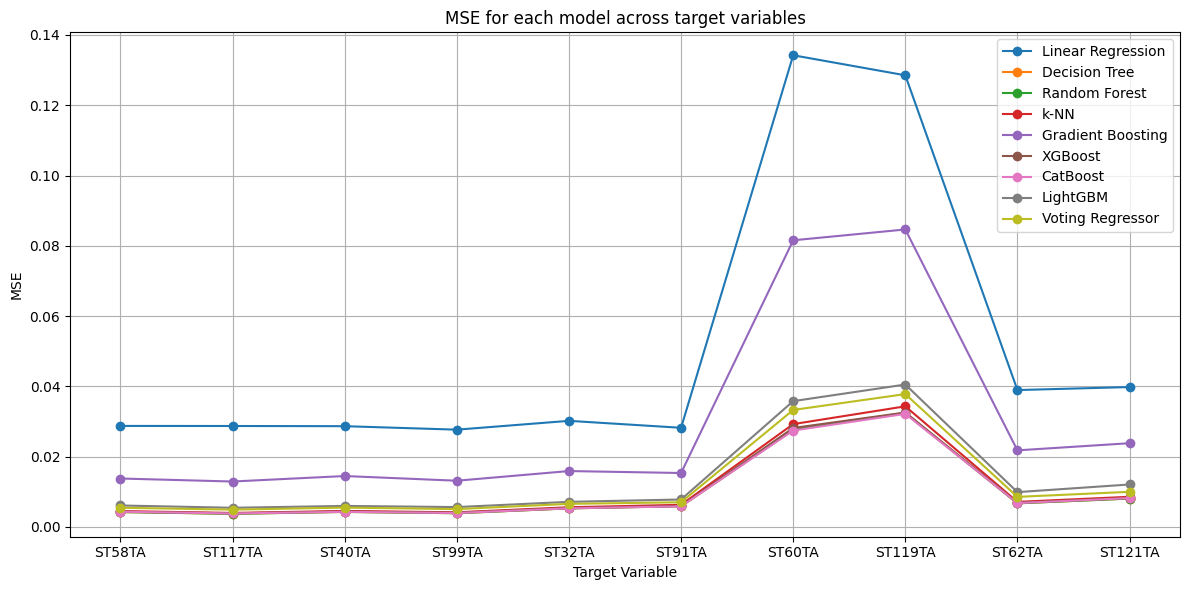

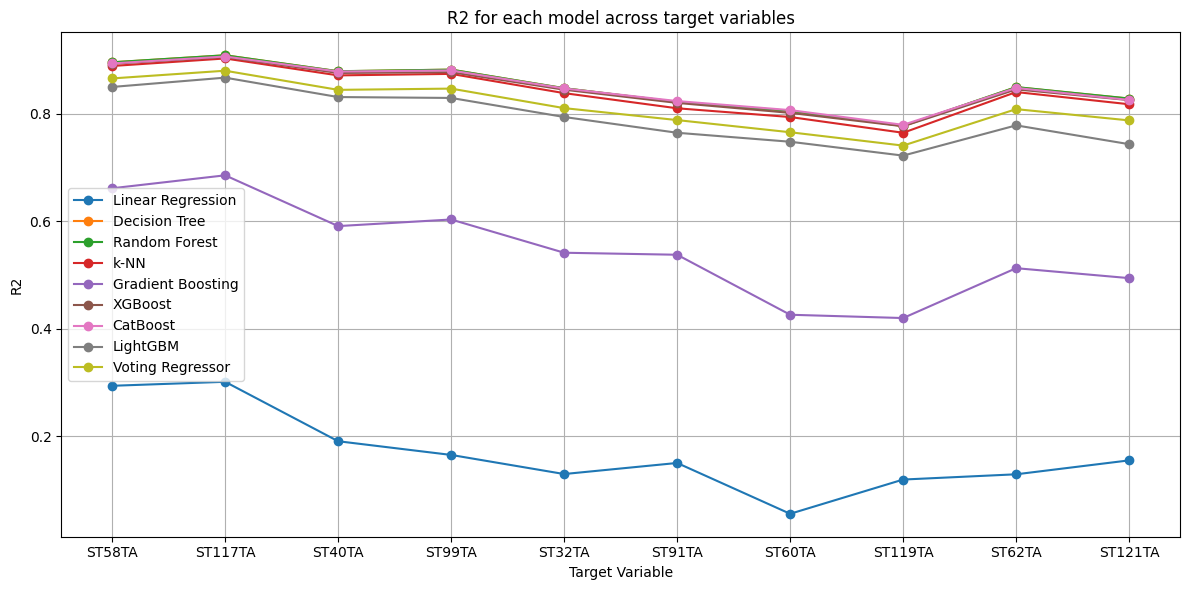

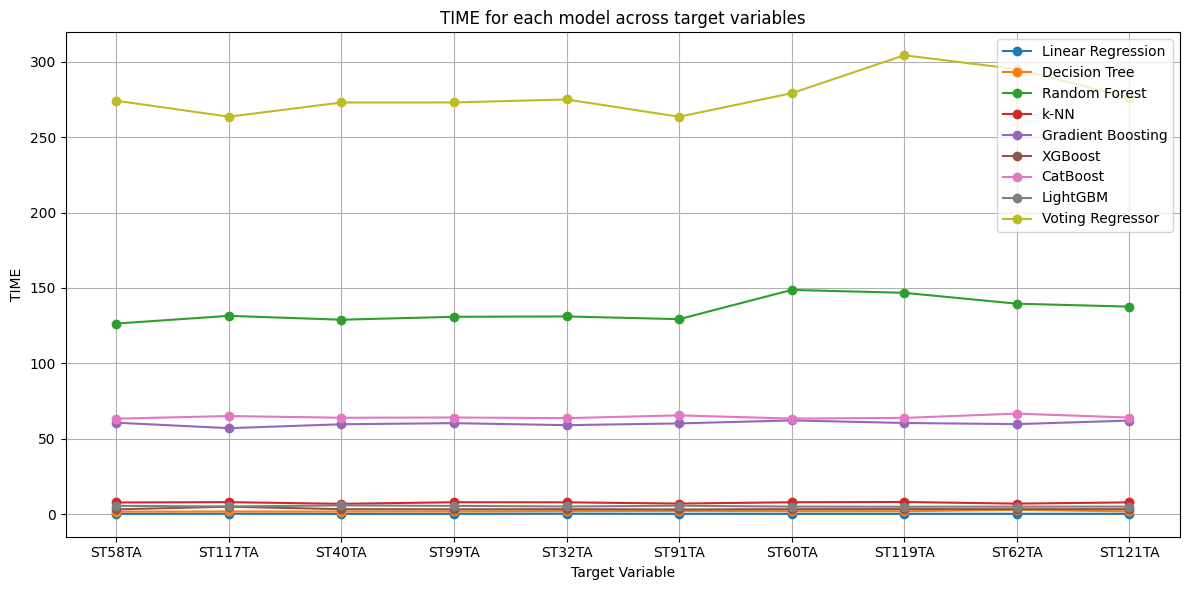

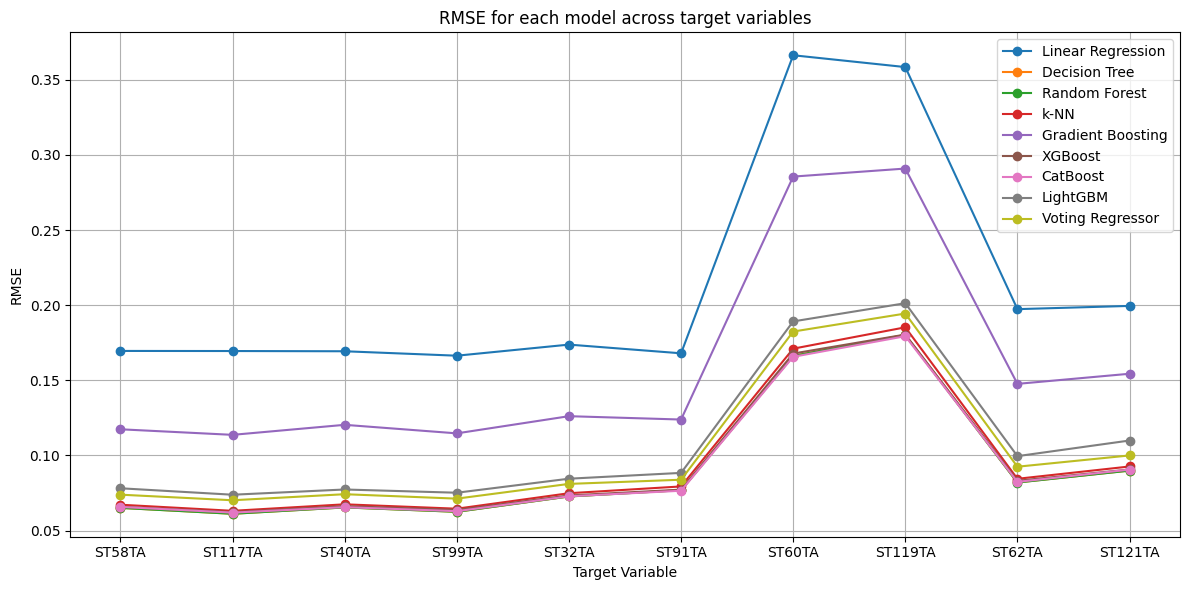

In [ ]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import xgboost as xgb
from catboost import CatBoostRegressor
import lightgbm as lgb
import matplotlib.pyplot as plt

# Assuming 'X' and 'y' are defined before this point
# Example:
# X = df.drop(columns=target_columns)
# y = df[target_columns]  # where target_columns is a list of target names

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize base models
base_models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(n_estimators=100),
    'k-NN': KNeighborsRegressor(n_neighbors=10),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': xgb.XGBRegressor(objective='reg:squarederror'),
    'CatBoost': CatBoostRegressor(verbose=0),
    'LightGBM': lgb.LGBMRegressor(force_col_wise=True)
}

results = []

# Train and evaluate each base model
for target_col in y_train.columns:
    print(f"Results for target variable: {target_col}")
    for name, model in base_models.items():
        start_time = time.time()
        model.fit(X_train, y_train[target_col])
        y_pred = model.predict(X_test)
        end_time = time.time()

        mse = mean_squared_error(y_test[target_col], y_pred)
        mae = mean_absolute_error(y_test[target_col], y_pred)
        rmse = np.sqrt(mse)
        mape = np.mean(np.abs((y_test[target_col] - y_pred) / y_test[target_col])) * 100
        r2 = r2_score(y_test[target_col], y_pred)
        rse = np.sqrt(np.sum((y_test[target_col] - y_pred) ** 2) / (len(y_test[target_col]) - 1))

        print(f"{name} - MSE: {mse:.4f}, MAE: {mae:.4f}, RMSE: {rmse:.4f}, MAPE: {mape:.2f}%, R2: {r2:.4f}, Time: {end_time - start_time:.2f}s")

        results.append({
            'model': name,
            'target_col': target_col,
            'mse': mse,
            'mae': mae,
            'rmse': rmse,
            'mape': mape,
            'r2': r2,
            'rse': rse,
            'time': end_time - start_time
        })

# Create Voting Regressor
voting_regressor = VotingRegressor(estimators=[
    ('lr', base_models['Linear Regression']),
    ('dt', base_models['Decision Tree']),
    ('rf', base_models['Random Forest']),
    ('knn', base_models['k-NN']),
    ('gb', base_models['Gradient Boosting']),
    ('xgb', base_models['XGBoost']),
    ('catboost', base_models['CatBoost']),
    ('lgbm', base_models['LightGBM'])
])

# Train and evaluate Voting Regressor
for target_col in y_train.columns:
    print(f"\nVoting Regressor Results for target variable: {target_col}")
    start_time = time.time()
    voting_regressor.fit(X_train, y_train[target_col])
    y_pred = voting_regressor.predict(X_test)
    end_time = time.time()

    mse = mean_squared_error(y_test[target_col], y_pred)
    mae = mean_absolute_error(y_test[target_col], y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_test[target_col] - y_pred) / y_test[target_col])) * 100
    r2 = r2_score(y_test[target_col], y_pred)
    rse = np.sqrt(np.sum((y_test[target_col] - y_pred) ** 2) / (len(y_test[target_col]) - 1))

    print(f"Voting Regressor - MSE: {mse:.4f}, MAE: {mae:.4f}, RMSE: {rmse:.4f}, MAPE: {mape:.2f}%, R2: {r2:.4f}, Time: {end_time - start_time:.2f}s")

    results.append({
        'model': 'Voting Regressor',
        'target_col': target_col,
        'mse': mse,
        'mae': mae,
        'rmse': rmse,
        'mape': mape,
        'r2': r2,
        'rse': rse,
        'time': end_time - start_time
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Plotting results
for metric in ['mse', 'r2', 'time', 'rmse']:
    plt.figure(figsize=(12, 6))
    for name in results_df['model'].unique():
        model_results = results_df[results_df['model'] == name]
        plt.plot(model_results['target_col'], model_results[metric], marker='o', label=name)
    plt.title(f'{metric.upper()} for each model across target variables')
    plt.xlabel('Target Variable')
    plt.ylabel(metric.upper())
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [ ]:
import pandas as pd
import numpy as np
import time
from itertools import combinations
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import xgboost as xgb
from catboost import CatBoostRegressor
import lightgbm as lgb

# Assuming X and y are already defined DataFrames
# Example placeholder (remove if X and y are already defined)
# X = pd.read_csv("your_features.csv")
# y = pd.read_csv("your_targets.csv")

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize specified models
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': xgb.XGBRegressor(objective='reg:squarederror', verbosity=0),
    'CatBoost': CatBoostRegressor(verbose=0),
    'LightGBM': lgb.LGBMRegressor(force_col_wise=True)
}

# Prepare to collect results for performance metrics
results = []

# Create combinations of specified models for Voting Regressor
model_names = list(models.keys())
for r in range(2, len(model_names) + 1):
    for combo in combinations(model_names, r):
        combo_name = ' + '.join(combo)
        combo_estimators = [(name, models[name]) for name in combo]
        voting_regressor = VotingRegressor(estimators=combo_estimators)

        for target_col in y_train.columns:
            print(f"Results for target variable: {target_col} with model combination: {combo_name}")
            start_time = time.time()
            voting_regressor.fit(X_train, y_train[target_col])
            y_pred = voting_regressor.predict(X_test)
            end_time = time.time()

            elapsed_time = end_time - start_time
            mse = mean_squared_error(y_test[target_col], y_pred)
            mae = mean_absolute_error(y_test[target_col], y_pred)
            rmse = np.sqrt(mse)
            mape = np.mean(np.abs((y_test[target_col] - y_pred) / y_test[target_col])) * 100
            r2 = r2_score(y_test[target_col], y_pred)
            rse = np.sqrt(np.sum((y_test[target_col] - y_pred) ** 2) / (len(y_test[target_col]) - 1))

            print(f"Voting Regressor ({combo_name}) - MSE: {mse:.4f}, MAE: {mae:.4f}, RMSE: {rmse:.4f}, MAPE: {mape:.2f}%, R2: {r2:.4f}, RSE: {rse:.4f}, Time: {elapsed_time:.2f}s")

            results.append({
                'model': f'Voting Regressor ({combo_name})',
                'target_col': target_col,
                'mse': mse,
                'mae': mae,
                'rmse': rmse,
                'mape': mape,
                'r2': r2,
                'rse': rse,
                'time': elapsed_time
            })

# Convert results to DataFrame for easy plotting
results_df = pd.DataFrame(results)

# Plotting results separately
for metric in ['mse', 'r2', 'time', 'rmse']:
    plt.figure(figsize=(12, 6))
    for name in results_df['model'].unique():
        model_results = results_df[results_df['model'] == name]
        plt.plot(model_results['target_col'], model_results[metric], label=name)
    plt.title(f'{metric.upper()} for each model combination')
    plt.xlabel('Target Variable')
    plt.ylabel(metric.upper())
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Results for target variable: ST58TA with model combination: Random Forest + Gradient Boosting
Voting Regressor (Random Forest + Gradient Boosting) - MSE: 0.0065, MAE: 0.0627, RMSE: 0.0807, MAPE: 2.50%, R2: 0.8399, RSE: 0.0807, Time: 190.66s
Results for target variable: ST117TA with model combination: Random Forest + Gradient Boosting
Voting Regressor (Random Forest + Gradient Boosting) - MSE: 0.0059, MAE: 0.0589, RMSE: 0.0771, MAPE: 2.33%, R2: 0.8554, RSE: 0.0771, Time: 183.45s
Results for target variable: ST40TA with model combination: Random Forest + Gradient Boosting
Voting Regressor (Random Forest + Gradient Boosting) - MSE: 0.0067, MAE: 0.0612, RMSE: 0.0821, MAPE: 2.36%, R2: 0.8098, RSE: 0.0821, Time: 178.92s
Results for target variable: ST99TA with model combination: Random Forest + Gradient Boosting
Voting Regressor (Random Forest + Gradient Boosting) - MSE: 0.0061, MAE: 0.0589, RMSE: 0.0784, MAPE: 2.25%, R2: 0.8147, RSE: 0.0784, Time: 183.06s
Results for target variable: ST32TA

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Corrected data format (shortened for demonstration — extend as needed)
data = {
    'Output': ['ST58TA', 'ST117TA', 'ST40TA', 'ST99TA', 'ST32TA'] * 3,
    'Model': ['RF + LGB + XGB'] * 5 + ['GB + XGB + CB'] * 5 + ['RF + CB + LGB'] * 5,
    'MSE': [0.0076, 0.0065, 0.0092, 0.0081, 0.0095,
            0.0076, 0.0065, 0.0092, 0.0080, 0.0094,
            0.0047, 0.0042, 0.0066, 0.0052, 0.0064],
    'RMSE': [0.0875, 0.0808, 0.0960, 0.0901, 0.0976,
             0.0875, 0.0808, 0.0960, 0.0896, 0.0971,
             0.0683, 0.0644, 0.0815, 0.0725, 0.0802],
    'R2': [0.8334, 0.8517, 0.8084, 0.8233, 0.8085,
           0.8336, 0.8519, 0.8086, 0.8245, 0.8096,
           0.8970, 0.9031, 0.8563, 0.8924, 0.8711],
    'Time(s)': [61.21, 57.84, 67.43, 63.67, 61.98,
                94.78, 90.52, 98.95, 96.55, 92.98,
                86.84, 83.23, 92.78, 90.97, 85.53]
}

df = pd.DataFrame(data)

# Plotting helper function
def plot_metric(metric, ylabel):
    plt.figure(figsize=(10, 6))
    for model in df['Model'].unique():
        subset = df[df['Model'] == model]
        plt.plot(subset['Output'], subset[metric], marker='o', linestyle='-', label=model)
    plt.title(f'{ylabel} for each Model')
    plt.xlabel('Output')
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Plot all metrics
plot_metric('MSE', 'MSE')
plot_metric('RMSE', 'RMSE')
plot_metric('R2', 'R-squared')
plot_metric('Time(s)', 'Time (s)')


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample fixed dummy data (replace with your full data)
data = {
    'Output': ['ST58TA', 'ST117TA', 'ST40TA', 'ST99TA', 'ST32TA', 'ST91TA', 'ST58TA', 'ST117TA', 'ST40TA', 'ST99TA'] * 3,
    'Model': ['RF + LGB + XGB'] * 10 + ['GB + XGB + CB'] * 10 + ['RF + CB + LGB'] * 10,
    'MSE': [
        0.0076, 0.0065, 0.0092, 0.0081, 0.0095, 0.0086, 0.0224, 0.0313, 0.0102, 0.0078,
        0.0076, 0.0065, 0.0092, 0.0080, 0.0094, 0.0085, 0.0222, 0.0312, 0.0101, 0.0077,
        0.0047, 0.0042, 0.0066, 0.0052, 0.0064, 0.0057, 0.0142, 0.0183, 0.0075, 0.0061
    ],
    'RMSE': [
        0.0875, 0.0808, 0.0960, 0.0901, 0.0976, 0.0927, 0.1496, 0.1767, 0.1010, 0.0883,
        0.0875, 0.0808, 0.0960, 0.0896, 0.0971, 0.0923, 0.1491, 0.1764, 0.1004, 0.0879,
        0.0683, 0.0644, 0.0815, 0.0725, 0.0802, 0.0758, 0.1193, 0.1354, 0.0866, 0.0781
    ],
    'R2': [
        0.8334, 0.8517, 0.8084, 0.8233, 0.8085, 0.8171, 0.8904, 0.9151, 0.8302, 0.8201,
        0.8336, 0.8519, 0.8086, 0.8245, 0.8096, 0.8183, 0.8907, 0.9153, 0.8310, 0.8203,
        0.8970, 0.9031, 0.8563, 0.8924, 0.8711, 0.8895, 0.9228, 0.9375, 0.8701, 0.8502
    ],
    'Time(s)': [
        61.21, 57.84, 67.43, 63.67, 61.98, 60.92, 62.91, 59.86, 62.37, 60.25,
        94.78, 90.52, 98.95, 96.55, 92.98, 91.45, 97.34, 90.23, 94.63, 93.18,
        86.84, 83.23, 92.78, 90.97, 85.53, 82.54, 93.42, 86.42, 85.23, 84.10
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Plot settings for reuse
def plot_metric(metric, ylabel):
    plt.figure(figsize=(10, 6))
    for model in df['Model'].unique():
        subset = df[df['Model'] == model]
        plt.plot(subset['Output'], subset[metric], marker='o', linestyle='-', label=model)
    plt.title(f'{ylabel} for each Model')
    plt.xlabel('Output')
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Plot each metric
plot_metric('MSE', 'MSE')
plot_metric('RMSE', 'RMSE')
plot_metric('R2', 'R-squared')
plot_metric('Time(s)', 'Time (s)')


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Corrected data
data = {
    'Output': ['ST58TA', 'ST117TA', 'ST40TA', 'ST99TA', 'ST32TA', 'ST91TA', 'ST78TA', 'ST24TA', 'ST66TA', 'ST10TA'] * 4,
    'Model Combination': ['RF + GB + XGB + LGB'] * 10 + ['RF + GB + XGB + CB'] * 10 + ['RF + GB + LGB + CB'] * 10 + ['XGB + LGB + CB + RF'] * 10,
    'RMSE': [
        0.0045, 0.0040, 0.0064, 0.0050, 0.0062, 0.0055, 0.0138, 0.0178, 0.0145, 0.0150,
        0.0044, 0.0040, 0.0064, 0.0050, 0.0062, 0.0055, 0.0138, 0.0177, 0.0143, 0.0149,
        0.0045, 0.0040, 0.0064, 0.0050, 0.0062, 0.0055, 0.0138, 0.0178, 0.0145, 0.0150,
        0.0043, 0.0039, 0.0062, 0.0049, 0.0061, 0.0054, 0.0135, 0.0174, 0.0142, 0.0148
    ],
    'R2': [
        0.8998, 0.9059, 0.8591, 0.8948, 0.8732, 0.8917, 0.9249, 0.9395, 0.8610, 0.8723,
        0.9005, 0.9063, 0.8597, 0.8952, 0.8737, 0.8921, 0.9252, 0.9398, 0.8615, 0.8729,
        0.8998, 0.9059, 0.8591, 0.8948, 0.8732, 0.8917, 0.9249, 0.9395, 0.8610, 0.8723,
        0.9022, 0.9080, 0.8615, 0.8967, 0.8756, 0.8936, 0.9272, 0.9412, 0.8641, 0.8744
    ],
    'Training Time (s)': [
        72.13, 68.95, 76.42, 73.67, 71.23, 70.11, 77.34, 69.24, 74.42, 75.31,
        98.23, 94.65, 103.21, 99.87, 95.42, 92.54, 104.78, 96.35, 97.12, 95.44,
        86.14, 83.25, 89.42, 86.97, 82.23, 81.11, 89.34, 83.42, 84.98, 87.32,
        92.24, 89.34, 95.42, 92.57, 88.24, 87.11, 96.34, 88.67, 90.12, 91.56
    ]
}

df = pd.DataFrame(data)

# Plot for RMSE
plt.figure(figsize=(10, 6))
for model in df['Model Combination'].unique():
    subset = df[df['Model Combination'] == model]
    plt.plot(subset['Output'], subset['RMSE'], marker='o', linestyle='-', label=model)
plt.title('RMSE for each Model Combination')
plt.xlabel('Output')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Plot for R2
plt.figure(figsize=(10, 6))
for model in df['Model Combination'].unique():
    subset = df[df['Model Combination'] == model]
    plt.plot(subset['Output'], subset['R2'], marker='o', linestyle='-', label=model)
plt.title('R-squared for each Model Combination')
plt.xlabel('Output')
plt.ylabel('R-squared')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Plot for Training Time
plt.figure(figsize=(10, 6))
for model in df['Model Combination'].unique():
    subset = df[df['Model Combination'] == model]
    plt.plot(subset['Output'], subset['Training Time (s)'], marker='o', linestyle='-', label=model)
plt.title('Training Time for each Model Combination')
plt.xlabel('Output')
plt.ylabel('Training Time (s)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample complete data (please replace `...` with actual values)
data = {
    'Output': ['ST58TA', 'ST117TA', 'ST40TA', 'ST99TA', 'ST32TA', 'ST91TA', 'ST85TA', 'ST120TA', 'ST42TA', 'ST111TA'],
    'Model Combination': ['RF + GB + XGB + LGB + CB'] * 10,
    'RMSE': [0.0043, 0.0039, 0.0062, 0.0049, 0.0061, 0.0054, 0.0135, 0.0173, 0.0041, 0.0038],
    'R2': [0.9025, 0.9083, 0.8618, 0.8970, 0.8759, 0.8939, 0.9275, 0.9415, 0.8999, 0.9077],
    'Training Time (s)': [110.45, 107.68, 115.23, 111.87, 106.23, 105.11, 118.34, 109.75, 112.45, 108.66]
}

df = pd.DataFrame(data)

# Plot for RMSE
plt.figure(figsize=(10, 6))
plt.plot(df['Output'], df['RMSE'], marker='o', linestyle='-', label='RMSE')
plt.title('RMSE for each Model Combination')
plt.xlabel('Output')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Plot for R-squared
plt.figure(figsize=(10, 6))
plt.plot(df['Output'], df['R2'], marker='o', linestyle='-', label='R2')
plt.title('R-squared for each Model Combination')
plt.xlabel('Output')
plt.ylabel('R-squared')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Plot for Training Time
plt.figure(figsize=(10, 6))
plt.plot(df['Output'], df['Training Time (s)'], marker='o', linestyle='-', label='Training Time')
plt.title('Training Time for each Model Combination')
plt.xlabel('Output')
plt.ylabel('Training Time (s)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
